# Generative Deep Learning (GAN)
## Como gerar dados em sequência?

A maneira universal utilizada para gerar dados em sequência em Deep Learning é treinar uma rede neural (normalmente com RNNs e ConvNets) para prever o próximo ou os próximos caracteres de um input.

Após finalizar o treinamento, pode-se gerar novas sequências iniciando um loop com um input padrão, onde o output dessa previsão será o próximo input.

## A importancia da estratégia de sampling

Quando estamos prevendo um texto, a maneira que escolhemos o próximo caracter é muito importante. 

Uma maneira simples seria utilizar softmax para obter o caracter de maior probabilidade, porém esse método retorna valores repetitivos ou textos que não correspondem com a realidade. Para contornar isso, podemos introduzir aleatóriedade no processo para que o texto gerado seja menos previsível, tornando o resultado mais interessante.

In [37]:
import numpy as np

def reweight_softmax(original_softmax, temp=0.5):
    softmax = np.log(original_softmax) / temp
    softmax = np.exp(softmax)
    return softmax / np.sum(softmax)

output = np.random.random_sample(10)

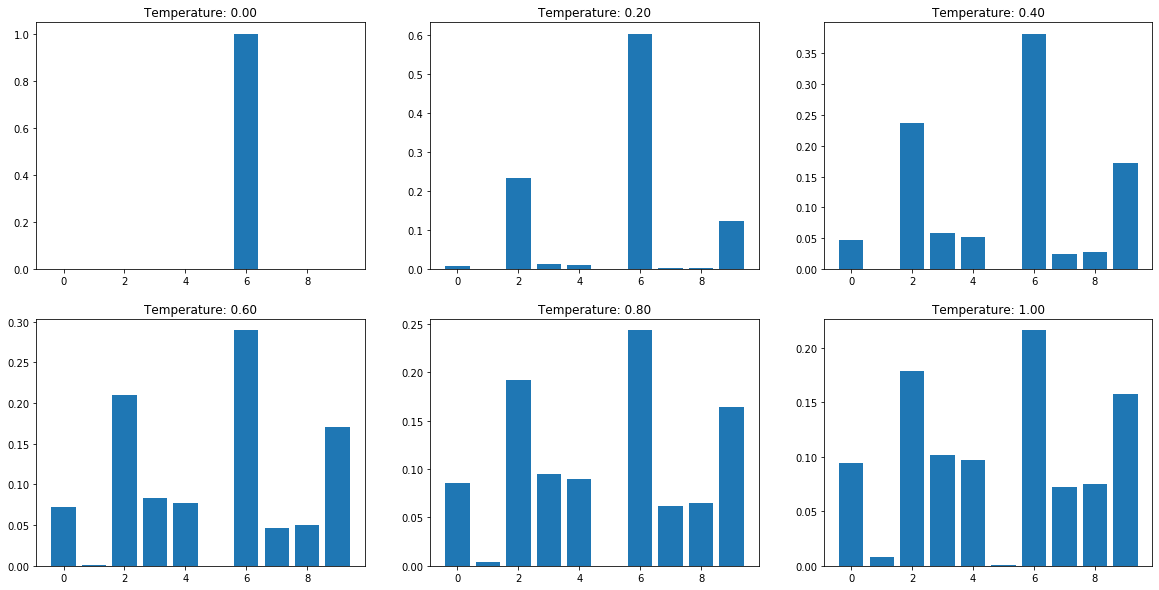

In [45]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(2, 3, figsize=(20, 10))

temp = 0.001

for row in range(2):
    for col in range(3):
        new_softmax = reweight_softmax(output, temp)
        axis[row, col].bar([x for x in range(0, 10)], new_softmax)
        axis[row, col].set_title('Temperature: {0:.2f}'.format(temp))
        temp += 0.2

plt.show()